In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

sns.set()

from sklearn.preprocessing import StandardScaler, RobustScaler

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [183]:
df = pd.read_csv('C:\\Users\\Muhammad Hazim\\Desktop\\bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [184]:
df.isnull().any().any()

False

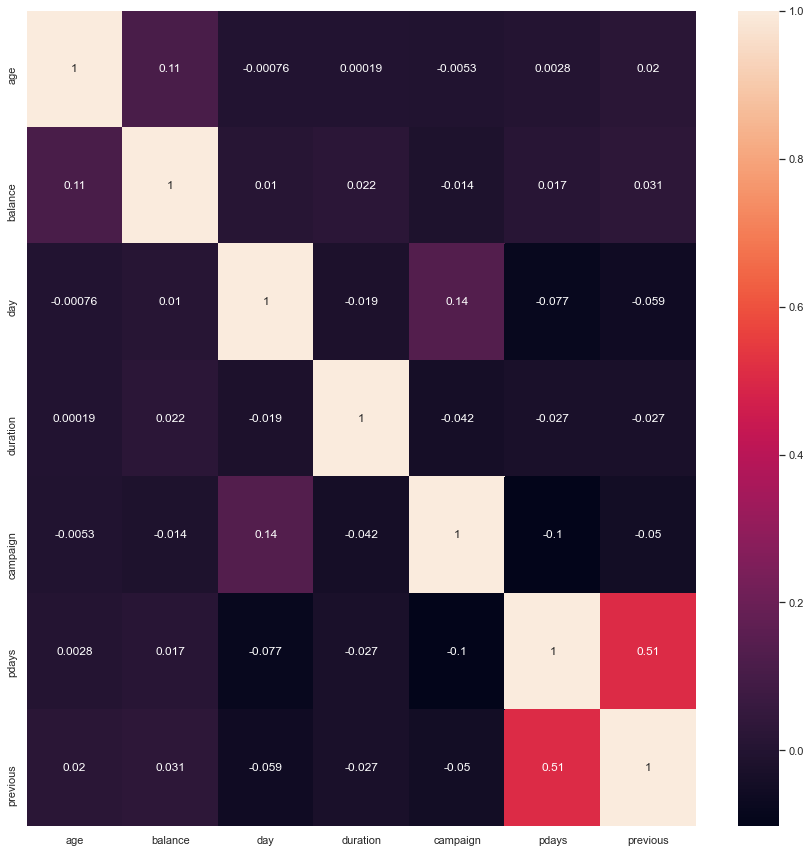

In [185]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

In [186]:
cat_feat = []

for column in df.columns.values:
    if (column != 'deposit') & (df[column].dtypes == 'O'):
        cat_feat.append(column)   
        
numd_feat = []

for column in df.columns.values:
    if (column != 'y') & (df[column].dtypes == 'int64'):
        numd_feat.append(column) 

numf_feat = []

for column in df.columns.values:
    if (column != 'y') & (df[column].dtypes == 'float64'):
        numf_feat.append(column)

In [187]:
def plot_bar(column):
    table = pd.DataFrame()
    table['No_deposit'] = df[df['deposit'] == 'no'][column].value_counts()
    table['Yes_deposit'] = df[df['deposit'] == 'yes'][column].value_counts()
    table.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

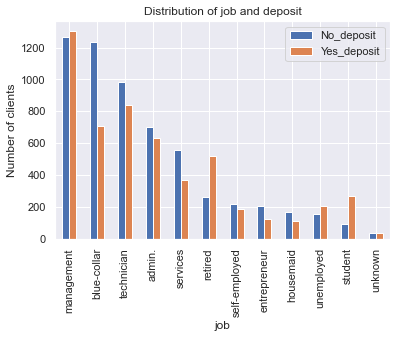

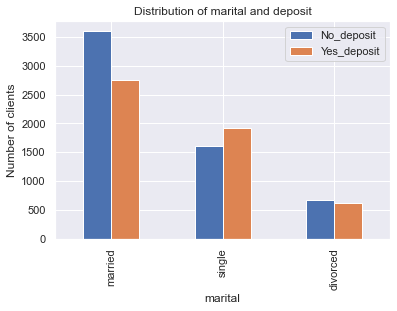

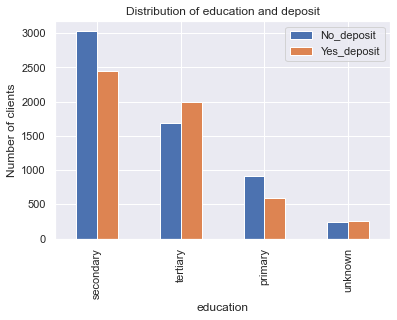

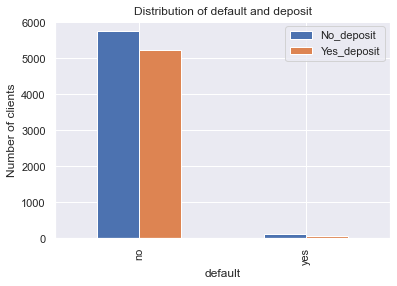

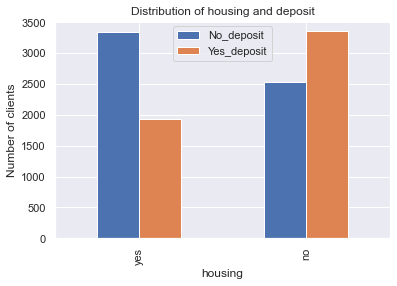

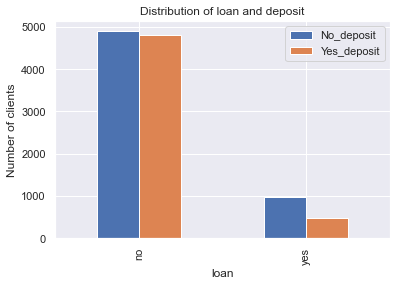

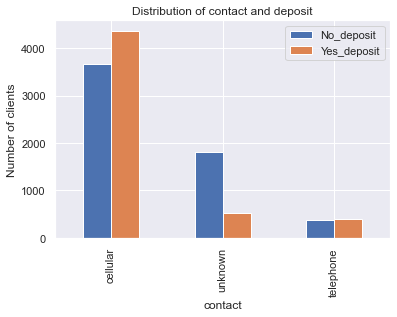

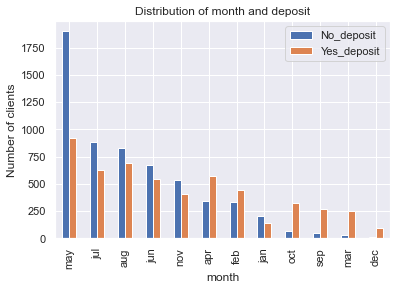

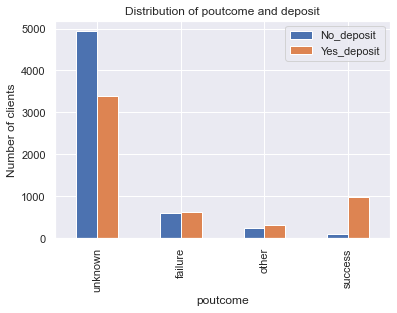

In [188]:
for column in cat_feat:
    plot_bar(column)

In [189]:
df.deposit = df.deposit.map({'yes':1, 'no':0})

In [190]:
numd_feat

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

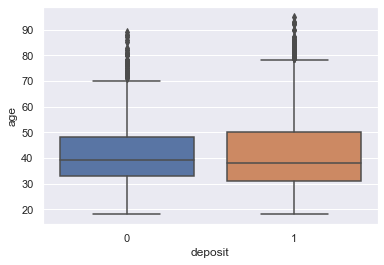

In [191]:
sns.boxplot(df['deposit'],df['age'])

(-2500.0, 7500.0)

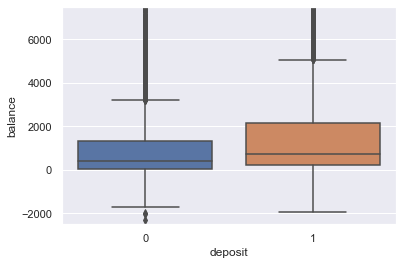

In [214]:
sns.boxplot(df['deposit'],df['balance'])
plt.ylim(-2500,7500)

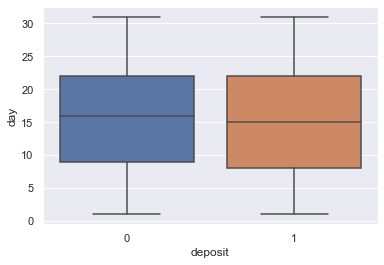

In [193]:
sns.boxplot(df['deposit'],df['day'])

(0.0, 2000.0)

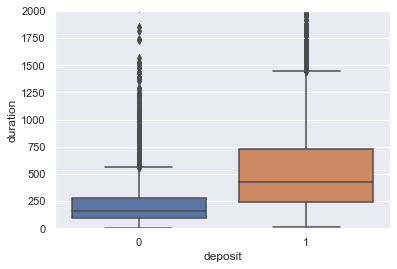

In [213]:
sns.boxplot(df['deposit'],df['duration'])
plt.ylim(0,2000)

(0.0, 30.0)

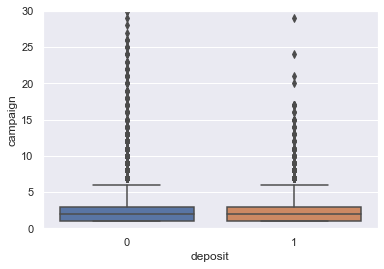

In [220]:
sns.boxplot(df['deposit'],df['campaign'])
plt.ylim(0,30)

In [196]:
df.pdays = df.pdays.replace(-1,0)

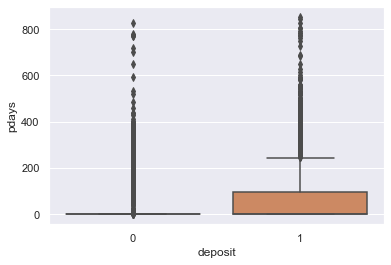

In [197]:
sns.boxplot(df['deposit'],df['pdays'])

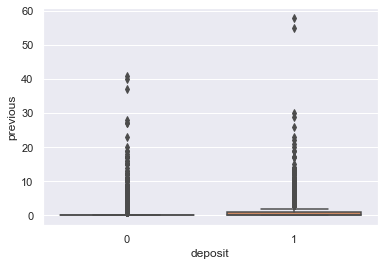

In [198]:
sns.boxplot(df['deposit'],df['previous'])

In [72]:
df = pd.get_dummies(df, drop_first = True)

In [73]:
x = df.drop("deposit", axis=1)
y = df["deposit"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [76]:
def score(model):
    df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
    df1['Train Score'] = [accuracy_score(y_train, model.predict(x_train)), precision_score(y_train, model.predict(x_train)), roc_auc_score(y_train, model.predict_proba(x_train)[:,1])]
    df1['Test Score'] = [accuracy_score(y_test, model.predict(x_test)), precision_score(y_test, model.predict(x_test)), roc_auc_score(y_test, model.predict_proba(x_test)[:,1])]        
    return df1

In [77]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [78]:
score(lr)

,Train Score,Test Score
Accuracy,0.793482,0.791760
Precision,0.797557,0.797392
ROC AUC,0.875999,0.878665


In [137]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [138]:
score(dt)

,Train Score,Test Score
Accuracy,0.820137,0.812808
Precision,0.818182,0.811891
ROC AUC,0.892031,0.881182


In [133]:
rf = RandomForestClassifier(max_depth=12)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12)

In [134]:
score(rf)

,Train Score,Test Score
Accuracy,0.909172,0.856247
Precision,0.884962,0.824099
ROC AUC,0.977536,0.920415


In [153]:
mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 10)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=10, max_iter=100)

In [154]:
score(mlp)

,Train Score,Test Score
Accuracy,0.807257,0.800269
Precision,0.839924,0.833333
ROC AUC,0.893015,0.896687


In [163]:
cb = CatBoostClassifier(learning_rate = 0.05)
cb.fit(x_train, y_train)

0:	learn: 0.6633182	total: 27.2ms	remaining: 27.2s
1:	learn: 0.6383490	total: 49.6ms	remaining: 24.7s
2:	learn: 0.6180341	total: 68.2ms	remaining: 22.7s
3:	learn: 0.5986327	total: 84ms	remaining: 20.9s
4:	learn: 0.5797949	total: 110ms	remaining: 21.9s
5:	learn: 0.5649007	total: 136ms	remaining: 22.6s
6:	learn: 0.5493691	total: 160ms	remaining: 22.7s
7:	learn: 0.5382194	total: 183ms	remaining: 22.7s
8:	learn: 0.5244020	total: 199ms	remaining: 21.9s
9:	learn: 0.5158203	total: 223ms	remaining: 22.1s
10:	learn: 0.5074519	total: 249ms	remaining: 22.4s
11:	learn: 0.4976010	total: 277ms	remaining: 22.8s
12:	learn: 0.4896348	total: 295ms	remaining: 22.4s
13:	learn: 0.4812996	total: 312ms	remaining: 22s
14:	learn: 0.4762828	total: 331ms	remaining: 21.7s
15:	learn: 0.4703392	total: 348ms	remaining: 21.4s
16:	learn: 0.4648769	total: 365ms	remaining: 21.1s
17:	learn: 0.4598239	total: 379ms	remaining: 20.7s
18:	learn: 0.4556072	total: 395ms	remaining: 20.4s
19:	learn: 0.4519224	total: 410ms	remaini

165:	learn: 0.3110811	total: 2.52s	remaining: 12.7s
166:	learn: 0.3106464	total: 2.54s	remaining: 12.7s
167:	learn: 0.3103668	total: 2.56s	remaining: 12.7s
168:	learn: 0.3100598	total: 2.58s	remaining: 12.7s
169:	learn: 0.3098208	total: 2.59s	remaining: 12.7s
170:	learn: 0.3095226	total: 2.61s	remaining: 12.6s
171:	learn: 0.3089940	total: 2.62s	remaining: 12.6s
172:	learn: 0.3084919	total: 2.64s	remaining: 12.6s
173:	learn: 0.3080179	total: 2.65s	remaining: 12.6s
174:	learn: 0.3074992	total: 2.67s	remaining: 12.6s
175:	learn: 0.3072457	total: 2.69s	remaining: 12.6s
176:	learn: 0.3068208	total: 2.7s	remaining: 12.6s
177:	learn: 0.3067032	total: 2.71s	remaining: 12.5s
178:	learn: 0.3061426	total: 2.73s	remaining: 12.5s
179:	learn: 0.3059971	total: 2.74s	remaining: 12.5s
180:	learn: 0.3056418	total: 2.75s	remaining: 12.5s
181:	learn: 0.3053291	total: 2.77s	remaining: 12.4s
182:	learn: 0.3048515	total: 2.78s	remaining: 12.4s
183:	learn: 0.3041482	total: 2.79s	remaining: 12.4s
184:	learn: 0

324:	learn: 0.2662856	total: 4.78s	remaining: 9.94s
325:	learn: 0.2660555	total: 4.8s	remaining: 9.93s
326:	learn: 0.2657569	total: 4.82s	remaining: 9.92s
327:	learn: 0.2655907	total: 4.84s	remaining: 9.91s
328:	learn: 0.2652267	total: 4.86s	remaining: 9.91s
329:	learn: 0.2650002	total: 4.88s	remaining: 9.9s
330:	learn: 0.2647571	total: 4.89s	remaining: 9.89s
331:	learn: 0.2645764	total: 4.91s	remaining: 9.88s
332:	learn: 0.2643523	total: 4.94s	remaining: 9.89s
333:	learn: 0.2640416	total: 4.96s	remaining: 9.88s
334:	learn: 0.2638990	total: 4.98s	remaining: 9.88s
335:	learn: 0.2637358	total: 5.01s	remaining: 9.89s
336:	learn: 0.2634910	total: 5.03s	remaining: 9.89s
337:	learn: 0.2633548	total: 5.06s	remaining: 9.91s
338:	learn: 0.2630985	total: 5.08s	remaining: 9.91s
339:	learn: 0.2628266	total: 5.1s	remaining: 9.9s
340:	learn: 0.2626138	total: 5.13s	remaining: 9.91s
341:	learn: 0.2622896	total: 5.16s	remaining: 9.93s
342:	learn: 0.2620583	total: 5.2s	remaining: 9.96s
343:	learn: 0.261

483:	learn: 0.2340451	total: 8.31s	remaining: 8.86s
484:	learn: 0.2338488	total: 8.33s	remaining: 8.85s
485:	learn: 0.2337084	total: 8.35s	remaining: 8.83s
486:	learn: 0.2335299	total: 8.37s	remaining: 8.82s
487:	learn: 0.2332893	total: 8.39s	remaining: 8.8s
488:	learn: 0.2331447	total: 8.41s	remaining: 8.78s
489:	learn: 0.2328620	total: 8.42s	remaining: 8.77s
490:	learn: 0.2326487	total: 8.44s	remaining: 8.75s
491:	learn: 0.2325328	total: 8.46s	remaining: 8.73s
492:	learn: 0.2323868	total: 8.47s	remaining: 8.72s
493:	learn: 0.2321799	total: 8.5s	remaining: 8.71s
494:	learn: 0.2319606	total: 8.53s	remaining: 8.7s
495:	learn: 0.2317937	total: 8.55s	remaining: 8.68s
496:	learn: 0.2316691	total: 8.57s	remaining: 8.67s
497:	learn: 0.2315171	total: 8.59s	remaining: 8.66s
498:	learn: 0.2313464	total: 8.61s	remaining: 8.64s
499:	learn: 0.2312461	total: 8.63s	remaining: 8.63s
500:	learn: 0.2310225	total: 8.64s	remaining: 8.61s
501:	learn: 0.2308754	total: 8.66s	remaining: 8.59s
502:	learn: 0.2

642:	learn: 0.2095427	total: 12.3s	remaining: 6.85s
643:	learn: 0.2094797	total: 12.4s	remaining: 6.84s
644:	learn: 0.2093708	total: 12.4s	remaining: 6.84s
645:	learn: 0.2092296	total: 12.5s	remaining: 6.84s
646:	learn: 0.2090579	total: 12.5s	remaining: 6.84s
647:	learn: 0.2089207	total: 12.6s	remaining: 6.82s
648:	learn: 0.2087852	total: 12.6s	remaining: 6.81s
649:	learn: 0.2086270	total: 12.6s	remaining: 6.79s
650:	learn: 0.2084813	total: 12.7s	remaining: 6.79s
651:	learn: 0.2082914	total: 12.7s	remaining: 6.77s
652:	learn: 0.2081488	total: 12.7s	remaining: 6.76s
653:	learn: 0.2079292	total: 12.8s	remaining: 6.75s
654:	learn: 0.2077366	total: 12.8s	remaining: 6.75s
655:	learn: 0.2076276	total: 12.9s	remaining: 6.74s
656:	learn: 0.2076191	total: 12.9s	remaining: 6.72s
657:	learn: 0.2074666	total: 12.9s	remaining: 6.71s
658:	learn: 0.2072728	total: 13s	remaining: 6.7s
659:	learn: 0.2071952	total: 13s	remaining: 6.7s
660:	learn: 0.2070873	total: 13s	remaining: 6.69s
661:	learn: 0.206940

803:	learn: 0.1894934	total: 15.9s	remaining: 3.87s
804:	learn: 0.1893771	total: 15.9s	remaining: 3.85s
805:	learn: 0.1892892	total: 15.9s	remaining: 3.83s
806:	learn: 0.1891813	total: 15.9s	remaining: 3.81s
807:	learn: 0.1891084	total: 15.9s	remaining: 3.79s
808:	learn: 0.1889269	total: 16s	remaining: 3.77s
809:	learn: 0.1888190	total: 16s	remaining: 3.75s
810:	learn: 0.1887493	total: 16s	remaining: 3.73s
811:	learn: 0.1886433	total: 16s	remaining: 3.71s
812:	learn: 0.1884896	total: 16s	remaining: 3.69s
813:	learn: 0.1884190	total: 16.1s	remaining: 3.67s
814:	learn: 0.1883460	total: 16.1s	remaining: 3.65s
815:	learn: 0.1881862	total: 16.1s	remaining: 3.63s
816:	learn: 0.1880999	total: 16.1s	remaining: 3.61s
817:	learn: 0.1879787	total: 16.1s	remaining: 3.59s
818:	learn: 0.1878378	total: 16.1s	remaining: 3.56s
819:	learn: 0.1877676	total: 16.1s	remaining: 3.54s
820:	learn: 0.1877044	total: 16.2s	remaining: 3.52s
821:	learn: 0.1876024	total: 16.2s	remaining: 3.5s
822:	learn: 0.1874887	t

963:	learn: 0.1710268	total: 19s	remaining: 709ms
964:	learn: 0.1709799	total: 19s	remaining: 689ms
965:	learn: 0.1707996	total: 19s	remaining: 669ms
966:	learn: 0.1706273	total: 19s	remaining: 650ms
967:	learn: 0.1704725	total: 19s	remaining: 630ms
968:	learn: 0.1704074	total: 19.1s	remaining: 610ms
969:	learn: 0.1703278	total: 19.1s	remaining: 590ms
970:	learn: 0.1702242	total: 19.1s	remaining: 570ms
971:	learn: 0.1701204	total: 19.1s	remaining: 551ms
972:	learn: 0.1699790	total: 19.1s	remaining: 531ms
973:	learn: 0.1698891	total: 19.1s	remaining: 511ms
974:	learn: 0.1697593	total: 19.2s	remaining: 491ms
975:	learn: 0.1695947	total: 19.2s	remaining: 472ms
976:	learn: 0.1695302	total: 19.2s	remaining: 452ms
977:	learn: 0.1694305	total: 19.2s	remaining: 432ms
978:	learn: 0.1693011	total: 19.2s	remaining: 412ms
979:	learn: 0.1692379	total: 19.2s	remaining: 393ms
980:	learn: 0.1691025	total: 19.2s	remaining: 373ms
981:	learn: 0.1689651	total: 19.3s	remaining: 353ms
982:	learn: 0.1689220	

In [164]:
score(cb)

,Train Score,Test Score
Accuracy,0.947475,0.865204
Precision,0.933211,0.837645
ROC AUC,0.990133,0.931415


In [177]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
score(xgb)

,Train Score,Test Score
Accuracy,0.904021,0.868339
Precision,0.880641,0.841682
ROC AUC,0.970390,0.928882


In [179]:
def build_feature_importance(model, x_train, y_train):
    
    data = pd.DataFrame(model.feature_importances_, x.columns.values, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[12,8])
    sns.barplot(x ='index', y='feature', data=data[:10], palette="Blues_d")
    plt.title('Feature inportance of {}'.format(model))
    plt.xticks(rotation=45)
    plt.show();

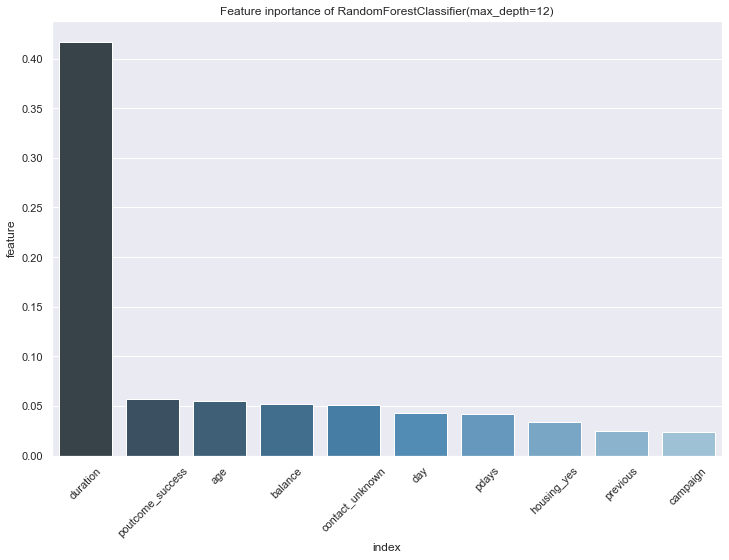

In [180]:
build_feature_importance(rf, x_train, y_train)

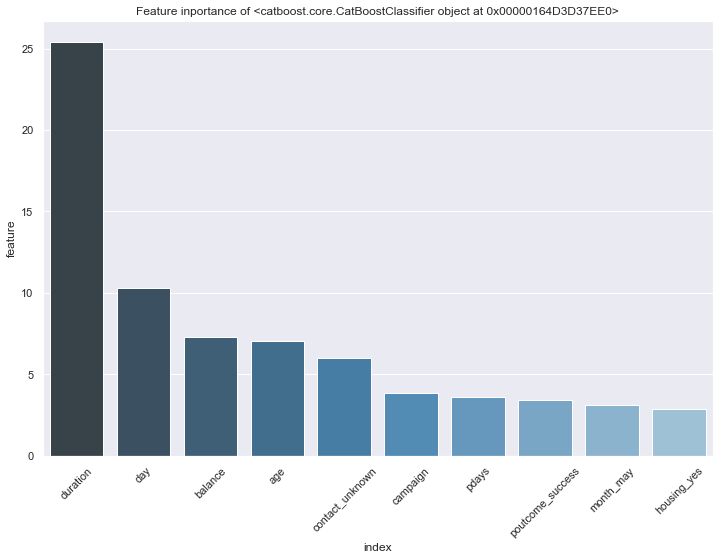

In [181]:
build_feature_importance(cb, x_train, y_train)

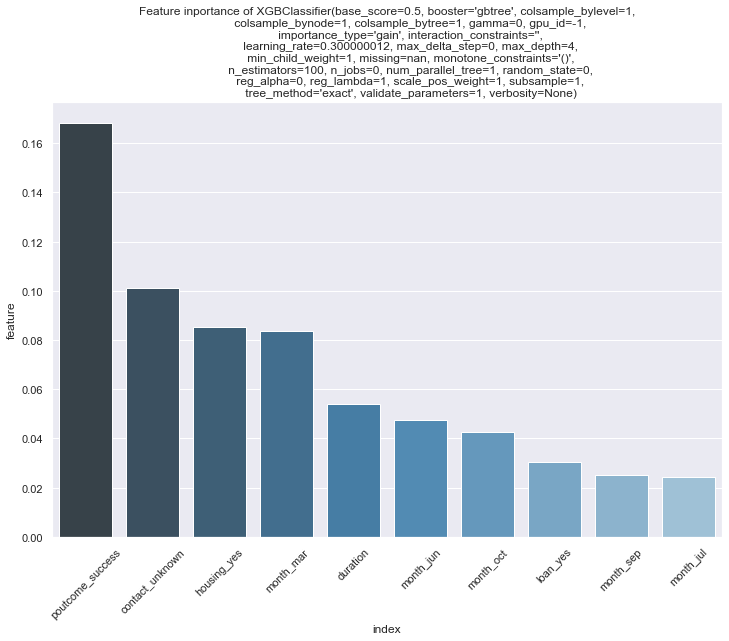

In [182]:
build_feature_importance(xgb, x_train, y_train)